# ініціалізація бібліотек

In [1]:

import numpy as np
from PIL import Image


## варіант 9
# Виконати гістограмне зменшення контрастності (див. лекція No1). Провести порівняльний аналіз

# пояснення
## що таке контраст ?
### У цифровій фотографії контраст можна визначити як різницю між світлими та темними ділянками зображення. Це відображається на гістограмі - графічному представленні розподілу яскравості пікселів на зображенні. Гістограма може допомогти визначити, чи є достатній контраст між світлими та темними областями зображення, і вирішити, чи потрібно налаштувати експозицію або використовувати інші методи для досягнення більшої контрастності зображення.
## безпосередньо правило зміни контрасту визначається як на Рис. 1.
![Рис. 1](media/formula.png)
рис 1

### На Рис. 1 показано приклад зменшення контрасності атже параметр Альфа є від 0 до 1.

# читаєм зображення

In [18]:
file_name ='media/4.jpeg'
img = Image.open(file_name)

In [19]:
img_array = np.array(img)
alpha_range = np.linspace(1, 0, num=10)
alpha_range

array([1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
       0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ])

In [20]:
import cv2
# only for test
def contrast_cv2(img_str, alpha,beta):
    img = cv2.imread(img_str)
    img_contrast = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return img_contrast

In [21]:
s = 2

# мій метод із порівнянням

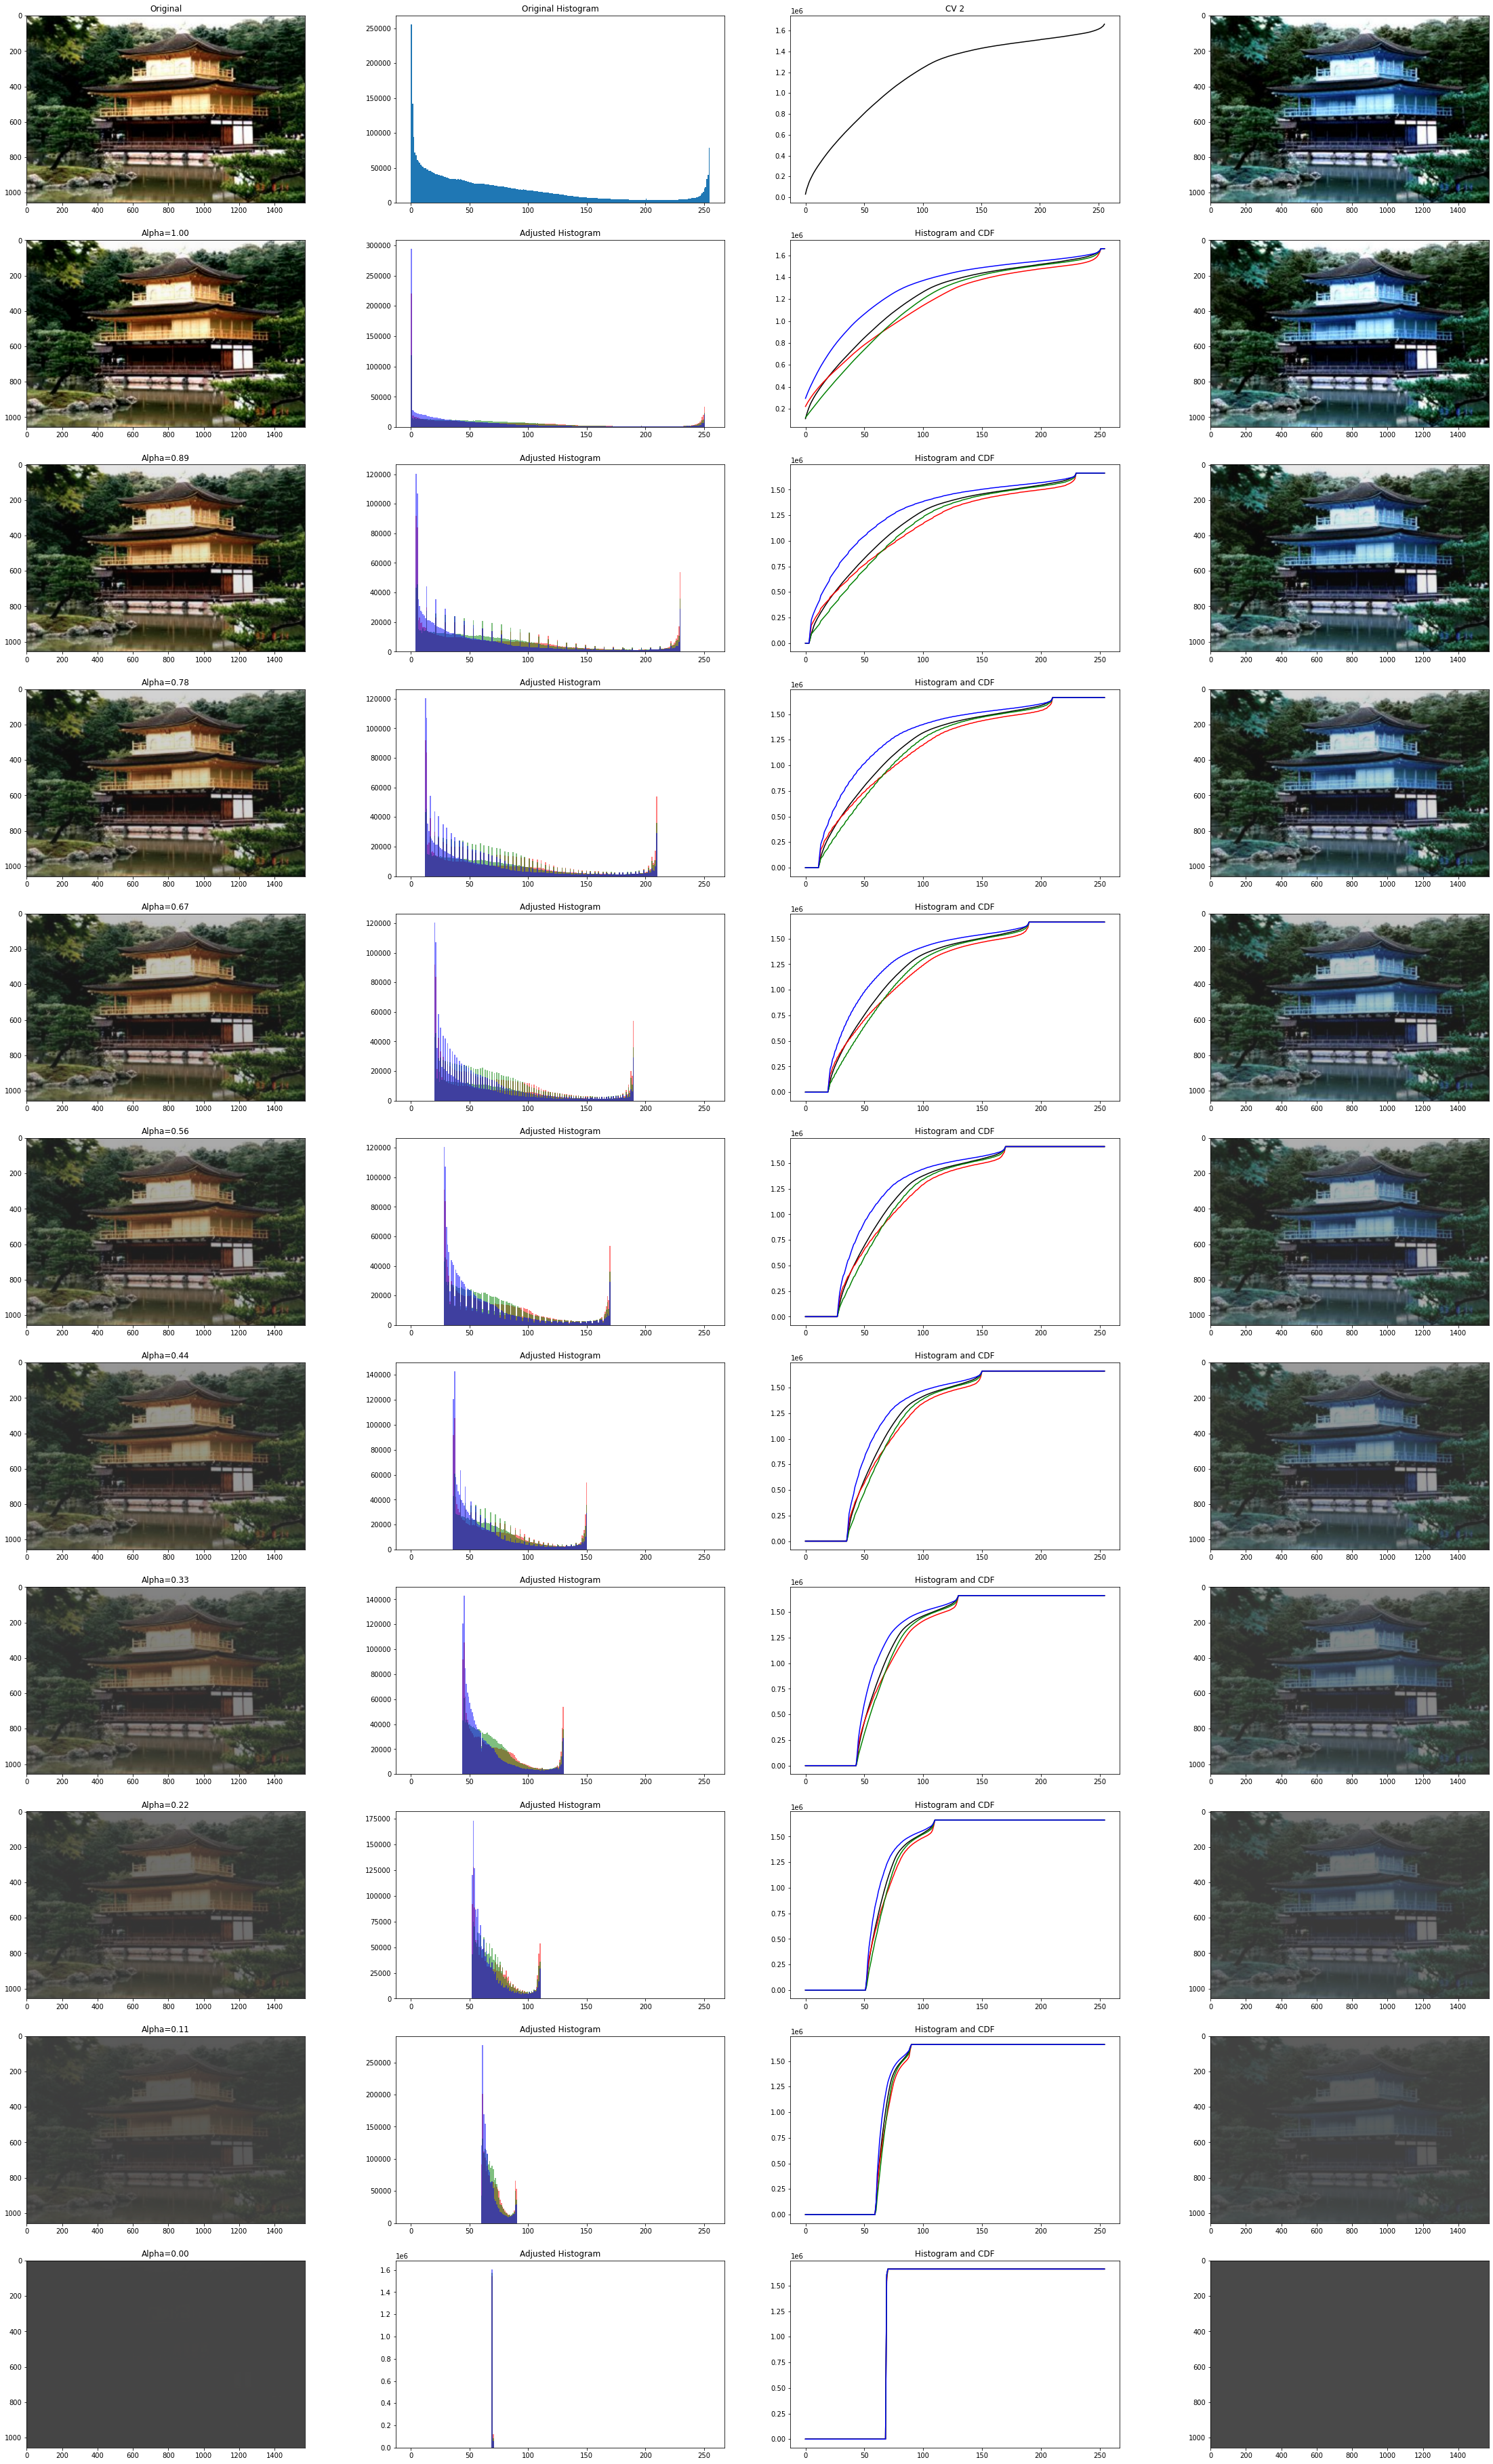

In [22]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(len(alpha_range)+1, 4, figsize=(40,66))


img_gray = np.mean(img_array, axis=2).astype(np.uint8)
hist, bins = np.histogram(img_gray.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()


axes[0,0].imshow(img)


axes[0,0].set_title('Original')
axes[0,1].hist(img_array.ravel(), bins=256, range=(0, 255))
axes[0,1].set_title('Original Histogram')
axes[0,2].plot(cdf_normalized*cdf.max(), color='black')
axes[0,2].set_title('Histogram and CDF')
axes[0,3].imshow(cv2.imread(filename=file_name))
axes[0,2].set_title('CV 2')

for i, alpha in enumerate(alpha_range):
    img_contrast = np.interp(img_array.flatten(), bins[:-1], cdf_normalized)
    img_contrast = img_contrast.reshape(img_array.shape)
    for j in range(3):
        #print(f"alpha = {alpha} , t  ={ (1-alpha) * np.mean(img_array)}, s = {s}")
        t = np.mean(img_array)
        img_contrast[:,:,j] = np.clip( (alpha * img_array[:,:,j] -s ) + ((1 - alpha) * img_contrast[:,:,j] - s ) + ( 1- alpha)*t,0,255)

    img_contrast = Image.fromarray(np.uint8(img_contrast))
    axes[i+1,0].imshow(img_contrast)
    axes[i+1,0].set_title(f'Alpha={alpha:.2f}')
    axes[i+1,1].hist(np.asarray(img_contrast)[:, :, 0].ravel(), bins=256, range=(0, 255), alpha=0.5, color='red')
    axes[i+1,1].hist(np.asarray(img_contrast)[:, :, 1].ravel(), bins=256, range=(0, 255), alpha=0.5, color='green')
    axes[i+1,1].hist(np.asarray(img_contrast)[:, :, 2].ravel(), bins=256, range=(0, 255), alpha=0.5, color='blue')
    axes[i+1,1].set_title('Adjusted Histogram')


    img_gray = np.mean(img_contrast, axis=2).astype(np.uint8)
    def get_cdf(img):
        hist, bins = np.histogram(img.flatten(), 255, [0, 255])
        cdf = hist.cumsum()
        cdf_normalized = cdf
        return cdf_normalized
    cdf_normalized_grey = get_cdf(img_gray)
    cdf_normalized_red = get_cdf(np.asarray(img_contrast)[:, :, 0].ravel())
    cdf_normalized_green = get_cdf(np.asarray(img_contrast)[:, :, 1].ravel())
    cdf_normalized_blue = get_cdf(np.asarray(img_contrast)[:, :, 2].ravel())
    axes[i+1,2].plot(cdf_normalized_grey, color='black')
    axes[i+1,2].set_title('Histogram and CDF')
#
    axes[i+1,2].plot(cdf_normalized_red, color='red')
    axes[i+1,2].plot(cdf_normalized_green, color='green')
    axes[i+1,2].plot(cdf_normalized_blue, color='blue')
    axes[i+1,3].imshow(contrast_cv2(file_name,alpha,( 1- alpha)*t))

plt.savefig('out4.png')